In [1]:
import numpy as np 
from sklearn.cluster import DBSCAN 
from sklearn.datasets.samples_generator import make_blobs 
from sklearn.preprocessing import StandardScaler 
import matplotlib.pyplot as plt 
%matplotlib inline

In [2]:
def createDataPoints(centroidLocation, numSamples, clusterDeviation):
    # Create random data and store in feature matrix X and response vector y.
    X, y = make_blobs(n_samples=numSamples, centers=centroidLocation, 
                                cluster_std=clusterDeviation)
    
    # Standardize features by removing the mean and scaling to unit variance
    X = StandardScaler().fit_transform(X)
    return X, y

In [3]:
X, y = createDataPoints([[4,3], [2,-1], [-1,4]] , 1500, 0.5)

In [4]:
epsilon = 0.3
minimumSamples = 7
db = DBSCAN(eps=epsilon, min_samples=minimumSamples).fit(X)
labels = db.labels_
labels

array([0, 1, 1, ..., 1, 2, 2])

In [21]:
set(labels)

{0, 1, 2}

<h2 id="distinguishing_outliers">Distinguishing Outliers</h2>

In [22]:
# First, create an array of booleans using the labels from db.
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
core_samples_mask

array([ True,  True,  True, ...,  True,  True,  True])

In [23]:
set(core_samples_mask)

{False, True}

In [24]:
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_clusters_

3

In [25]:
# Remove repetition in labels by turning it into a set.
unique_labels = set(labels)
unique_labels

{0, 1, 2}

<h2 id="data_visualization">Data visualization</h2>

In [26]:
# Create colors for the clusters.
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))
colors

array([[0.61960784, 0.00392157, 0.25882353, 1.        ],
       [0.99807766, 0.99923106, 0.74602076, 1.        ],
       [0.36862745, 0.30980392, 0.63529412, 1.        ]])

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

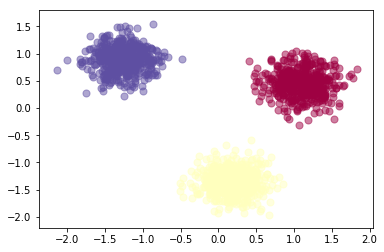

In [27]:
# Plot the points with colors
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = 'k'

    class_member_mask = (labels == k)

    # Plot the datapoints that are clustered
    xy = X[class_member_mask & core_samples_mask]
    plt.scatter(xy[:, 0], xy[:, 1],s=50, c=col, marker=u'o', alpha=0.5)

    # Plot the outliers
    xy = X[class_member_mask & ~core_samples_mask]
    plt.scatter(xy[:, 0], xy[:, 1],s=50, c=col, marker=u'o', alpha=0.5)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


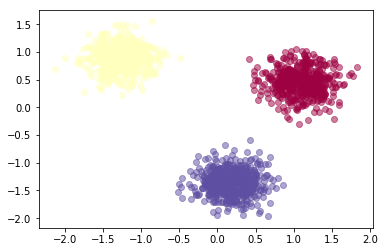

In [28]:
### testing if it is any different with kMeans??
from sklearn.cluster import KMeans 
k = 3
k_means3 = KMeans(init = "k-means++", n_clusters = k, n_init = 12)
k_means3.fit(X)
fig = plt.figure(figsize=(6, 4))
ax = fig.add_subplot(1, 1, 1)
for k, col in zip(range(k), colors):
    my_members = (k_means3.labels_ == k)
    plt.scatter(X[my_members, 0], X[my_members, 1],  c=col, marker=u'o', alpha=0.5)
plt.show()

<h1> using real world data - weather!</h1>

### About the dataset

		
<h4 align = "center">
Environment Canada    
Monthly Values for July - 2015	
</h4>
<html>
<head>
<style>
table {
    font-family: arial, sans-serif;
    border-collapse: collapse;
    width: 100%;
}

td, th {
    border: 1px solid #dddddd;
    text-align: left;
    padding: 8px;
}

tr:nth-child(even) {
    background-color: #dddddd;
}
</style>
</head>
<body>

<table>
  <tr>
    <th>Name in the table</th>
    <th>Meaning</th>
  </tr>
  <tr>
    <td><font color = "green"><strong>Stn_Name</font></td>
    <td><font color = "green"><strong>Station Name</font</td>
  </tr>
  <tr>
    <td><font color = "green"><strong>Lat</font></td>
    <td><font color = "green"><strong>Latitude (North+, degrees)</font></td>
  </tr>
  <tr>
    <td><font color = "green"><strong>Long</font></td>
    <td><font color = "green"><strong>Longitude (West - , degrees)</font></td>
  </tr>
  <tr>
    <td>Prov</td>
    <td>Province</td>
  </tr>
  <tr>
    <td>Tm</td>
    <td>Mean Temperature (°C)</td>
  </tr>
  <tr>
    <td>DwTm</td>
    <td>Days without Valid Mean Temperature</td>
  </tr>
  <tr>
    <td>D</td>
    <td>Mean Temperature difference from Normal (1981-2010) (°C)</td>
  </tr>
  <tr>
    <td><font color = "black">Tx</font></td>
    <td><font color = "black">Highest Monthly Maximum Temperature (°C)</font></td>
  </tr>
  <tr>
    <td>DwTx</td>
    <td>Days without Valid Maximum Temperature</td>
  </tr>
  <tr>
    <td><font color = "black">Tn</font></td>
    <td><font color = "black">Lowest Monthly Minimum Temperature (°C)</font></td>
  </tr>
  <tr>
    <td>DwTn</td>
    <td>Days without Valid Minimum Temperature</td>
  </tr>
  <tr>
    <td>S</td>
    <td>Snowfall (cm)</td>
  </tr>
  <tr>
    <td>DwS</td>
    <td>Days without Valid Snowfall</td>
  </tr>
  <tr>
    <td>S%N</td>
    <td>Percent of Normal (1981-2010) Snowfall</td>
  </tr>
  <tr>
    <td><font color = "green"><strong>P</font></td>
    <td><font color = "green"><strong>Total Precipitation (mm)</font></td>
  </tr>
  <tr>
    <td>DwP</td>
    <td>Days without Valid Precipitation</td>
  </tr>
  <tr>
    <td>P%N</td>
    <td>Percent of Normal (1981-2010) Precipitation</td>
  </tr>
  <tr>
    <td>S_G</td>
    <td>Snow on the ground at the end of the month (cm)</td>
  </tr>
  <tr>
    <td>Pd</td>
    <td>Number of days with Precipitation 1.0 mm or more</td>
  </tr>
  <tr>
    <td>BS</td>
    <td>Bright Sunshine (hours)</td>
  </tr>
  <tr>
    <td>DwBS</td>
    <td>Days without Valid Bright Sunshine</td>
  </tr>
  <tr>
    <td>BS%</td>
    <td>Percent of Normal (1981-2010) Bright Sunshine</td>
  </tr>
  <tr>
    <td>HDD</td>
    <td>Degree Days below 18 °C</td>
  </tr>
  <tr>
    <td>CDD</td>
    <td>Degree Days above 18 °C</td>
  </tr>
  <tr>
    <td>Stn_No</td>
    <td>Climate station identifier (first 3 digits indicate   drainage basin, last 4 characters are for sorting alphabetically).</td>
  </tr>
  <tr>
    <td>NA</td>
    <td>Not Available</td>
  </tr>


</table>

</body>
</html>

 

In [29]:
path = \
'https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/weather-stations20140101-20141231.csv'

In [30]:
import csv
import pandas as pd
import numpy as np

#Read csv
pdf = pd.read_csv(path)
pdf.head(5)

,Stn_Name,Lat,Long,Prov,Tm,DwTm,D,Tx,DwTx,Tn,...,DwP,P%N,S_G,Pd,BS,DwBS,BS%,HDD,CDD,Stn_No
0,CHEMAINUS,48.935,-123.742,BC,8.2,0.0,NaN,13.5,0.0,1.0,...,0.0,NaN,0.0,12.0,NaN,NaN,NaN,273.3,0.0,1011500
1,COWICHAN LAKE FORESTRY,48.824,-124.133,BC,7.0,0.0,3.0,15.0,0.0,-3.0,...,0.0,104.0,0.0,12.0,NaN,NaN,NaN,307.0,0.0,1012040
2,LAKE COWICHAN,48.829,-124.052,BC,6.8,13.0,2.8,16.0,9.0,-2.5,...,9.0,NaN,NaN,11.0,NaN,NaN,NaN,168.1,0.0,1012055
3,DISCOVERY ISLAND,48.425,-123.226,BC,NaN,NaN,NaN,12.5,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1012475
4,DUNCAN KELVIN CREEK,48.735,-123.728,BC,7.7,2.0,3.4,14.5,2.0,-1.0,...,2.0,NaN,NaN,11.0,NaN,NaN,NaN,267.7,0.0,1012573


In [31]:
pdf = pdf[pd.notnull(pdf["Tm"])]
pdf = pdf.reset_index(drop=True)
pdf.head(5)

,Stn_Name,Lat,Long,Prov,Tm,DwTm,D,Tx,DwTx,Tn,...,DwP,P%N,S_G,Pd,BS,DwBS,BS%,HDD,CDD,Stn_No
0,CHEMAINUS,48.935,-123.742,BC,8.2,0.0,NaN,13.5,0.0,1.0,...,0.0,NaN,0.0,12.0,NaN,NaN,NaN,273.3,0.0,1011500
1,COWICHAN LAKE FORESTRY,48.824,-124.133,BC,7.0,0.0,3.0,15.0,0.0,-3.0,...,0.0,104.0,0.0,12.0,NaN,NaN,NaN,307.0,0.0,1012040
2,LAKE COWICHAN,48.829,-124.052,BC,6.8,13.0,2.8,16.0,9.0,-2.5,...,9.0,NaN,NaN,11.0,NaN,NaN,NaN,168.1,0.0,1012055
3,DUNCAN KELVIN CREEK,48.735,-123.728,BC,7.7,2.0,3.4,14.5,2.0,-1.0,...,2.0,NaN,NaN,11.0,NaN,NaN,NaN,267.7,0.0,1012573
4,ESQUIMALT HARBOUR,48.432,-123.439,BC,8.8,0.0,NaN,13.1,0.0,1.9,...,8.0,NaN,NaN,12.0,NaN,NaN,NaN,258.6,0.0,1012710


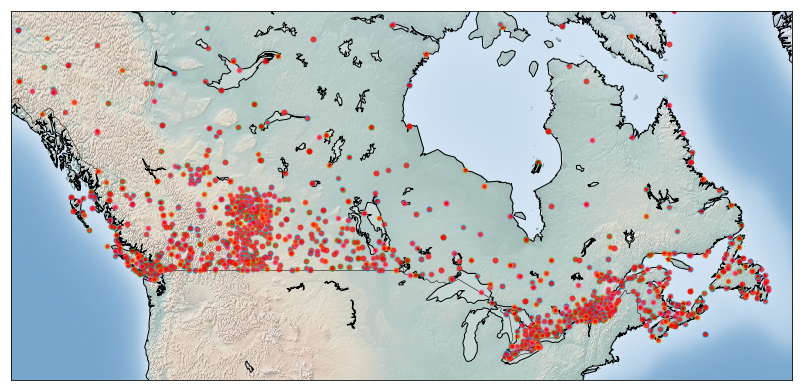

In [32]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
from pylab import rcParams
%matplotlib inline
rcParams['figure.figsize'] = (14,10)

llon=-140
ulon=-50
llat=40
ulat=65

pdf = pdf[(pdf['Long'] > llon) & (pdf['Long'] < ulon) & (pdf['Lat'] > llat) &(pdf['Lat'] < ulat)]

my_map = Basemap(projection='merc',
            resolution = 'l', area_thresh = 1000.0,
            llcrnrlon=llon, llcrnrlat=llat, #min longitude (llcrnrlon) and latitude (llcrnrlat)
            urcrnrlon=ulon, urcrnrlat=ulat) #max longitude (urcrnrlon) and latitude (urcrnrlat)

my_map.drawcoastlines()
my_map.drawcountries()
# my_map.drawmapboundary()
my_map.fillcontinents(color = 'white', alpha = 0.3)
my_map.shadedrelief()

# To collect data based on stations        

xs,ys = my_map(np.asarray(pdf.Long), np.asarray(pdf.Lat))
pdf['xm']= xs.tolist()
pdf['ym'] =ys.tolist()

#Visualization1
for index,row in pdf.iterrows():
#   x,y = my_map(row.Long, row.Lat)
   my_map.plot(row.xm, row.ym,markerfacecolor =([1,0,0]),  marker='o', markersize= 5, alpha = 0.75)
#plt.text(x,y,stn)
plt.show()

In [34]:
pdf.head()

,Stn_Name,Lat,Long,Prov,Tm,DwTm,D,Tx,DwTx,Tn,...,Pd,BS,DwBS,BS%,HDD,CDD,Stn_No,xm,ym,Clus_Db
0,CHEMAINUS,48.935,-123.742,BC,8.2,0.0,NaN,13.5,0.0,1.0,...,12.0,NaN,NaN,NaN,273.3,0.0,1011500,1.807806e+06,1.396332e+06,0
1,COWICHAN LAKE FORESTRY,48.824,-124.133,BC,7.0,0.0,3.0,15.0,0.0,-3.0,...,12.0,NaN,NaN,NaN,307.0,0.0,1012040,1.764329e+06,1.377564e+06,0
2,LAKE COWICHAN,48.829,-124.052,BC,6.8,13.0,2.8,16.0,9.0,-2.5,...,11.0,NaN,NaN,NaN,168.1,0.0,1012055,1.773336e+06,1.378409e+06,0
3,DUNCAN KELVIN CREEK,48.735,-123.728,BC,7.7,2.0,3.4,14.5,2.0,-1.0,...,11.0,NaN,NaN,NaN,267.7,0.0,1012573,1.809363e+06,1.362546e+06,0
4,ESQUIMALT HARBOUR,48.432,-123.439,BC,8.8,0.0,NaN,13.1,0.0,1.9,...,12.0,NaN,NaN,NaN,258.6,0.0,1012710,1.841498e+06,1.311615e+06,0


In [40]:
from sklearn.cluster import DBSCAN
import sklearn.utils
from sklearn.preprocessing import StandardScaler
sklearn.utils.check_random_state(1000)
Clus_dataSet = pdf[['xm','ym']]
Clus_dataSet = np.nan_to_num(Clus_dataSet)
Clus_dataSet = StandardScaler().fit_transform(Clus_dataSet)

# Compute DBSCAN
db = DBSCAN(eps=0.1, min_samples=10).fit(Clus_dataSet)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
pdf["Clus_Db"]=labels

realClusterNum=len(set(labels)) - (1 if -1 in labels else 0)
clusterNum = len(set(labels)) 


# A sample of clusters
pdf[["Stn_Name","Tx","Tm","Clus_Db"]].head(5)

,Stn_Name,Tx,Tm,Clus_Db
0,CHEMAINUS,13.5,8.2,0
1,COWICHAN LAKE FORESTRY,15.0,7.0,0
2,LAKE COWICHAN,16.0,6.8,0
3,DUNCAN KELVIN CREEK,14.5,7.7,0
4,ESQUIMALT HARBOUR,13.1,8.8,0


Cluster 0, Avg Temp: -2.6756410256410255
Cluster 1, Avg Temp: 3.173684210526315
Cluster 2, Avg Temp: -9.564285714285715
Cluster 3, Avg Temp: -19.45
Cluster 4, Avg Temp: -18.352
Cluster 5, Avg Temp: -15.639330543933054
Cluster 6, Avg Temp: -18.84
Cluster 7, Avg Temp: -11.563265306122448
Cluster 8, Avg Temp: -9.664705882352939


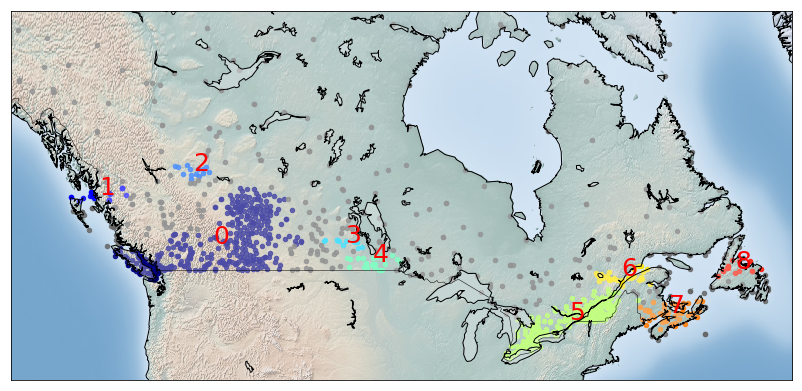

In [41]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
from pylab import rcParams
%matplotlib inline
rcParams['figure.figsize'] = (14,10)

my_map = Basemap(projection='merc',
            resolution = 'l', area_thresh = 1000.0,
            llcrnrlon=llon, llcrnrlat=llat, #min longitude (llcrnrlon) and latitude (llcrnrlat)
            urcrnrlon=ulon, urcrnrlat=ulat) #max longitude (urcrnrlon) and latitude (urcrnrlat)

my_map.drawcoastlines()
my_map.drawcountries()
#my_map.drawmapboundary()
my_map.fillcontinents(color = 'white', alpha = 0.3)
my_map.shadedrelief()

# To create a color map
colors = plt.get_cmap('jet')(np.linspace(0.0, 1.0, clusterNum))



#Visualization1
for clust_number in set(labels):
    c=(([0.4,0.4,0.4]) if clust_number == -1 else colors[np.int(clust_number)])
    clust_set = pdf[pdf.Clus_Db == clust_number]                    
    my_map.scatter(clust_set.xm, clust_set.ym, color =c,  marker='o', s= 20, alpha = 0.85)
    if clust_number != -1:
        cenx=np.mean(clust_set.xm) 
        ceny=np.mean(clust_set.ym) 
        plt.text(cenx,ceny,str(clust_number), fontsize=25, color='red',)
        print ("Cluster "+str(clust_number)+', Avg Temp: '+ str(np.mean(clust_set.Tm)))